[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/MaxMitre/Notas_Estructuradas/blob/main/Sesion04_NotasE_Asset_Swap.ipynb)

# Asset Swap

Muy simplificado, es cambiar flujos fijos por flotantes o viceversa.

Ejemplo, compro un bono que paga cupones cada cierto tiempo y despues entro en un swap para intercambiar mis flujos fijos por los flujos variables de alguien mas.

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
# Parámetros del bono
valor_nominal = 100.0
cupon_fijo = 0.05          # 5% anual
frecuencia = 2             # Pagos semestrales
plazos = 4                 # 2 años (4 periodos de 6 meses)
df = [1/(1+.05)**(.5), 1/(1+.05)**(1), 1/(1+ .05)**(1.5), 1/(1+.05)**(2)]  # Factores de descuento
# Datos del swap
tasa_flotante = [0.044, 0.049, 0.048, 0.050]  # Tasas forward estimadas
spread = 0.002                                # 20 puntos base sobre tasa flotante

In [ ]:
df

[0.9759000729485331, 0.9523809523809523, 0.929428640903365, 0.9070294784580498]

In [ ]:
# 1. Flujos del bono: 4 cupones + valor nominal al final
cupon = valor_nominal * cupon_fijo / frecuencia
flujos_bono = [cupon] * (plazos - 1) + [cupon + valor_nominal]

flujos_bono

[2.5, 2.5, 2.5, 102.5]

In [ ]:
# 2. Calcular el precio del bono como el valor presente de sus flujos
precio_bono = sum(flujos_bono[i] * df[i] for i in range(plazos))
print(f"Precio calculado del bono: {precio_bono:.2f}")

Precio calculado del bono: 100.11


In [ ]:
# Recordemos que podemos ver el precio del bono con cupones utilizando los factores de descuento
# Así se ven los valores presentes de cada cupón
np.sum(np.array(flujos_bono) * np.array(df))

np.float64(100.11479570753224)

In [ ]:
# 3. Pata fija del asset swap: se pagan los cupones del bono
flujos_fijos = [cupon] * plazos
print(f'Todos los flujos fijos: {flujos_fijos}')
vp_fijos = sum(flujos_fijos[i] * df[i] for i in range(plazos))
vp_fijos

Todos los flujos fijos: [2.5, 2.5, 2.5, 2.5]


9.411847861727251

In [ ]:
tasa_flotante

[0.044, 0.049, 0.048, 0.05]

In [ ]:
# 4. Pata flotante: se recibe tasa flotante + spread
flujos_flotantes = [
    valor_nominal * (tasa_flotante[i] + spread) / frecuencia
    for i in range(plazos)
]
print(f'Todos los flujos flotantes {flujos_flotantes}')
vp_flotantes = sum(flujos_flotantes[i] * df[i] for i in range(plazos))
vp_flotantes

Todos los flujos flotantes [2.3, 2.5500000000000003, 2.5, 2.6]


9.354989842602397

In [ ]:
# 5. Ajuste por el precio pagado por el bono
ajuste_precio = valor_nominal - precio_bono
ajuste_precio

-0.11479570753223811

In [ ]:
# 6. Valor del asset swap
valor_asset_swap = vp_flotantes - vp_fijos - ajuste_precio

print(f"Valor presente de flujos fijos: {vp_fijos:.2f}")
print(f"Valor presente de flujos flotantes: {vp_flotantes:.2f}")
print(f"Ajuste por precio del bono: {ajuste_precio:.2f}")
print(f"Valor del Asset Swap: {valor_asset_swap:.2f}")

Valor presente de flujos fijos: 9.41
Valor presente de flujos flotantes: 9.35
Ajuste por precio del bono: -0.11
Valor del Asset Swap: 0.06


Si el valor del asset swap es positivo, el inversionista está recibiendo un beneficio neto (por ejemplo, compró el bono barato o el spread flotante es alto).

Si es negativo, el swap puede no ser atractivo a los niveles actuales.

# Ejercicio

Un modo más simple de verlos es:

- Compro mi bono con cupones.
- De los flujos que recibiré de los cupones, guardo una parte (un porcentaje del cupón) y digo que ofrezco una taza fija con lo demas (Por ejemplo, si en 6 meses recibiera 2.5 que es de un cupón 5%, digo que voy a pagar tasa fija a 4.8%, que son 2.4)
- Calculo flujos fijos y flotantes

Puede reutilizar el código de arriba para resolverlo

In [ ]:
# Espacio para ejercicio

# Creemos una función que calcule el valor del asset swap

In [ ]:
def calcular_valor_asset_swap(
    valor_nominal: float,
    cupon_fijo: float,
    frecuencia: int,
    df: list,
    tasas_flotantes: list,
    spread: float
) -> float:
    """
    Calcula el valor presente de un asset swap desde el punto de vista del comprador del bono.

    Parámetros:
    - valor_nominal: Valor nominal del bono (por ejemplo, 100).
    - cupon_fijo: Tasa de cupón anual fija del bono (por ejemplo, 0.05 para 5%).
    - frecuencia: Número de pagos al año (2 para semestral, 1 para anual, etc.).
    - df: Lista de factores de descuento por periodo.
    - tasas_flotantes: Lista de tasas flotantes esperadas (una por periodo).
    - spread: Spread sobre la tasa flotante (en forma decimal, ej. 0.002 para 20 bps).

    Retorna:
    - Valor presente neto del asset swap.
    """
    n = len(df)
    assert n == len(tasas_flotantes), "La cantidad de factores de descuento y tasas flotantes debe coincidir."

    # Calcular cupones fijos del bono
    cupon = valor_nominal * cupon_fijo / frecuencia

    # Flujos del bono: cupones + valor nominal al final
    flujos_bono = [cupon] * (n - 1) + [cupon + valor_nominal]

    # Precio del bono: valor presente de sus flujos
    precio_bono = sum(flujos_bono[i] * df[i] for i in range(n))

    # Valor presente de flujos fijos (pata fija del swap que tú pagas)
    flujos_fijos = [cupon] * n
    vp_fijos = sum(flujos_fijos[i] * df[i] for i in range(n))

    # Valor presente de flujos flotantes (que tú recibes)
    flujos_flotantes = [
        valor_nominal * (tasas_flotantes[i] + spread) / frecuencia
        for i in range(n)
    ]
    vp_flotantes = sum(flujos_flotantes[i] * df[i] for i in range(n))

    # Ajuste por el precio del bono
    ajuste_precio = valor_nominal - precio_bono

    # Valor neto del asset swap
    valor_swap = vp_flotantes - vp_fijos - ajuste_precio
    return valor_swap


In [ ]:
# Diccionario con el que crearemo un DataFrame
un_primer_caso = {"valor_nominal": 100,
    "cupon_fijo": 0.05,
    "frecuencia": 2,
    "df": [1/(1+.05)**(.5), 1/(1+.05)**(1), 1/(1+ .05)**(1.5), 1/(1+.05)**(2)],
    "tasas_flotantes": [0.044, 0.049, 0.048, 0.050],
    "spread": 0.002}

In [ ]:
un_primer_caso

{'valor_nominal': 100,
 'cupon_fijo': 0.05,
 'frecuencia': 2,
 'df': [0.9759000729485331,
  0.9523809523809523,
  0.929428640903365,
  0.9070294784580498],
 'tasas_flotantes': [0.044, 0.049, 0.048, 0.05],
 'spread': 0.002}

In [ ]:
pd.DataFrame(un_primer_caso)

,valor_nominal,cupon_fijo,frecuencia,df,tasas_flotantes,spread
0,100,0.05,2,0.975900,0.044,0.002
1,100,0.05,2,0.952381,0.049,0.002
2,100,0.05,2,0.929429,0.048,0.002
3,100,0.05,2,0.907029,0.050,0.002


In [ ]:
pd.DataFrame([un_primer_caso])

,valor_nominal,cupon_fijo,frecuencia,df,tasas_flotantes,spread
0,100,0.05,2,"[0.9759000729485331, 0.9523809523809523, 0.929...","[0.044, 0.049, 0.048, 0.05]",0.002


In [ ]:
np.linspace(0,0.01,11)

array([0.   , 0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008,
       0.009, 0.01 ])

In [ ]:
# Utilidad de la función CONCAT de Pandas
df_grande = pd.DataFrame()
for element in np.linspace(0,0.01,11):
    un_primer_caso["spread"] = element
    df_grande = pd.concat([df_grande, pd.DataFrame([un_primer_caso])])

df_grande

,valor_nominal,cupon_fijo,frecuencia,df,tasas_flotantes,spread
0,100,0.05,2,"[0.9759000729485331, 0.9523809523809523, 0.929...","[0.044, 0.049, 0.048, 0.05]",0.000
0,100,0.05,2,"[0.9759000729485331, 0.9523809523809523, 0.929...","[0.044, 0.049, 0.048, 0.05]",0.001
0,100,0.05,2,"[0.9759000729485331, 0.9523809523809523, 0.929...","[0.044, 0.049, 0.048, 0.05]",0.002
0,100,0.05,2,"[0.9759000729485331, 0.9523809523809523, 0.929...","[0.044, 0.049, 0.048, 0.05]",0.003
0,100,0.05,2,"[0.9759000729485331, 0.9523809523809523, 0.929...","[0.044, 0.049, 0.048, 0.05]",0.004
0,100,0.05,2,"[0.9759000729485331, 0.9523809523809523, 0.929...","[0.044, 0.049, 0.048, 0.05]",0.005
0,100,0.05,2,"[0.9759000729485331, 0.9523809523809523, 0.929...","[0.044, 0.049, 0.048, 0.05]",0.006
0,100,0.05,2,"[0.9759000729485331, 0.9523809523809523, 0.929...","[0.044, 0.049, 0.048, 0.05]",0.007
0,100,0.05,2,"[0.9759000729485331, 0.9523809523809523, 0.929...","[0.044, 0.049, 0.048, 0.05]",0.008
0,100,0.05,2,"[0.9759000729485331, 0.9523809523809523, 0.929...","[0.044, 0.049, 0.048, 0.05]",0.009


In [ ]:
df_grande.reset_index(drop=True, inplace=True)
df_grande

,valor_nominal,cupon_fijo,frecuencia,df,tasas_flotantes,spread
0,100,0.05,2,"[0.9759000729485331, 0.9523809523809523, 0.929...","[0.044, 0.049, 0.048, 0.05]",0.000
1,100,0.05,2,"[0.9759000729485331, 0.9523809523809523, 0.929...","[0.044, 0.049, 0.048, 0.05]",0.001
2,100,0.05,2,"[0.9759000729485331, 0.9523809523809523, 0.929...","[0.044, 0.049, 0.048, 0.05]",0.002
3,100,0.05,2,"[0.9759000729485331, 0.9523809523809523, 0.929...","[0.044, 0.049, 0.048, 0.05]",0.003
4,100,0.05,2,"[0.9759000729485331, 0.9523809523809523, 0.929...","[0.044, 0.049, 0.048, 0.05]",0.004
5,100,0.05,2,"[0.9759000729485331, 0.9523809523809523, 0.929...","[0.044, 0.049, 0.048, 0.05]",0.005
6,100,0.05,2,"[0.9759000729485331, 0.9523809523809523, 0.929...","[0.044, 0.049, 0.048, 0.05]",0.006
7,100,0.05,2,"[0.9759000729485331, 0.9523809523809523, 0.929...","[0.044, 0.049, 0.048, 0.05]",0.007
8,100,0.05,2,"[0.9759000729485331, 0.9523809523809523, 0.929...","[0.044, 0.049, 0.048, 0.05]",0.008
9,100,0.05,2,"[0.9759000729485331, 0.9523809523809523, 0.929...","[0.044, 0.049, 0.048, 0.05]",0.009


In [ ]:
# Apply, un método muy útil que a veces es ignorado
# ¿QUE PASA SI EJECUTO ESTE CUADRO DE CODIGO 2 VECES?
df_grande['valor_swap'] = df_grande.apply(lambda x: calcular_valor_asset_swap(**x), axis=1)


In [ ]:
df_grande

,valor_nominal,cupon_fijo,frecuencia,df,tasas_flotantes,spread,valor_swap
0,100,0.05,2,"[0.9759000729485331, 0.9523809523809523, 0.929...","[0.044, 0.049, 0.048, 0.05]",0.000,-0.318536
1,100,0.05,2,"[0.9759000729485331, 0.9523809523809523, 0.929...","[0.044, 0.049, 0.048, 0.05]",0.001,-0.130299
2,100,0.05,2,"[0.9759000729485331, 0.9523809523809523, 0.929...","[0.044, 0.049, 0.048, 0.05]",0.002,0.057938
3,100,0.05,2,"[0.9759000729485331, 0.9523809523809523, 0.929...","[0.044, 0.049, 0.048, 0.05]",0.003,0.246175
4,100,0.05,2,"[0.9759000729485331, 0.9523809523809523, 0.929...","[0.044, 0.049, 0.048, 0.05]",0.004,0.434412
5,100,0.05,2,"[0.9759000729485331, 0.9523809523809523, 0.929...","[0.044, 0.049, 0.048, 0.05]",0.005,0.622649
6,100,0.05,2,"[0.9759000729485331, 0.9523809523809523, 0.929...","[0.044, 0.049, 0.048, 0.05]",0.006,0.810886
7,100,0.05,2,"[0.9759000729485331, 0.9523809523809523, 0.929...","[0.044, 0.049, 0.048, 0.05]",0.007,0.999122
8,100,0.05,2,"[0.9759000729485331, 0.9523809523809523, 0.929...","[0.044, 0.049, 0.048, 0.05]",0.008,1.187359
9,100,0.05,2,"[0.9759000729485331, 0.9523809523809523, 0.929...","[0.044, 0.049, 0.048, 0.05]",0.009,1.375596


In [ ]:
# MOSTRAR MODO DE EVITAR PROBLEMA
df_grande['valor_swap'] = df_grande.apply(lambda x: calcular_valor_asset_swap(x['valor_nominal'], x['cupon_fijo'], x['frecuencia'], x['df'], x['tasas_flotantes'], x['spread']), axis=1)

<Axes: >

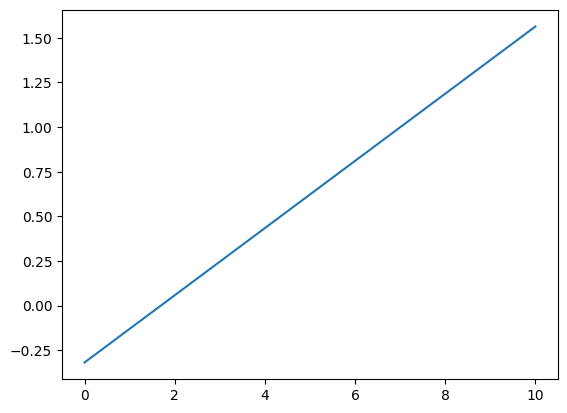

In [ ]:
df_grande.valor_swap.plot()

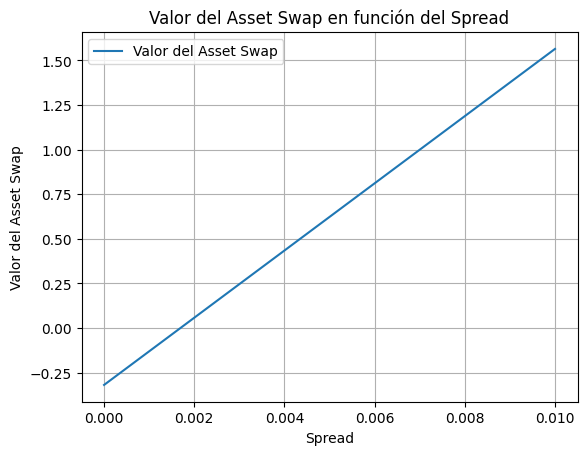

In [ ]:
import matplotlib.pyplot as plt

plt.plot(df_grande.spread, df_grande.valor_swap, label='Valor del Asset Swap')
plt.title('Valor del Asset Swap en función del Spread')
plt.legend()
plt.xlabel('Spread')
plt.ylabel('Valor del Asset Swap')
plt.grid()
plt.show()

# Precauciones frente a Concatenar

In [ ]:
a = pd.DataFrame({'a':[1,2,3], 'b':[4,5,6], 'c':[7,8,9]})
a

,a,b,c
0,1,4,7
1,2,5,8
2,3,6,9


In [ ]:
b = pd.DataFrame({'d':[11,13]}, index=[0,2])
b

,d
0,11
2,13


In [ ]:
# Concatena pero no toma el índice en referencia
resultado_1 = pd.concat([a,b])
resultado_1

,a,b,c,d
0,1.0,4.0,7.0,NaN
1,2.0,5.0,8.0,NaN
2,3.0,6.0,9.0,NaN
0,NaN,NaN,NaN,11.0
2,NaN,NaN,NaN,13.0


In [ ]:
resultado_2 = pd.concat([a,b], axis=1)
resultado_2

,a,b,c,d
0,1,4,7,11.0
1,2,5,8,NaN
2,3,6,9,13.0


In [ ]:
resultado_2 = pd.concat([a,b], axis=0)
resultado_2

,a,b,c,d
0,1.0,4.0,7.0,NaN
1,2.0,5.0,8.0,NaN
2,3.0,6.0,9.0,NaN
0,NaN,NaN,NaN,11.0
2,NaN,NaN,NaN,13.0


## Recomendación: Cuando estén relizando algún procesamiento de datos y vayan a concatenar tablas, tomen una o dos lineas de las tablas a concatenar y vean el resultado al hacerlo.